Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

Loading datasets

In [2]:
df=pd.read_csv('Chase.csv')

In [3]:
df

,Applicant_ID,Full_Name,Age,Gender,Employment_Status,Annual_Income,Credit_Score,Loan_Amount,Loan_Term,Property_Type,...,Home_Ownership,Loan_Type,Employment_Sector,Co_Applicant,Residency_Status,Loan_Purpose_Type,Bank_Relationship_Years,Employment_Stability_Years,Savings_Balance,Loan_Status
0,819974,Charlie Taylor,31,Female,Student,81414,591,41261,24,Apartment,...,Rent,Refinance,Education,No,Citizen,Auto Loan,14,4,19006,Rejected
1,176119,Casey Taylor,49,Other,Unemployed,47213,653,29081,24,Condo,...,Rent,Refinance,Manufacturing,Yes,Student Visa,Medical Loan,13,4,9527,Rejected
2,100648,Jordan Brown,31,Other,Employed,93447,702,41778,60,Apartment,...,Mortgage,Refinance,Government,Yes,Work Visa,Medical Loan,6,8,3833,Rejected
3,413561,Morgan Smith,37,Female,Unemployed,73492,731,39119,48,Townhouse,...,Mortgage,First Loan,Manufacturing,No,Citizen,Medical Loan,9,0,40021,Approved
4,783007,Morgan Wilson,56,Male,Self-Employed,80112,500,45496,36,Single Family,...,Own,First Loan,Manufacturing,Yes,Citizen,Small Business Loan,4,12,2948,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,265812,Taylor Davis,44,Male,Self-Employed,42598,598,27514,24,Single Family,...,Own,Refinance,Healthcare,No,Permanent Resident,Small Business Loan,3,8,26752,Rejected
49996,479194,Jordan Davis,52,Female,Student,45937,643,48499,36,Apartment,...,Other,First Loan,Government,Yes,Work Visa,Personal Loan,3,4,33975,Rejected
49997,846046,Casey Taylor,23,Female,Self-Employed,26554,811,44298,60,Townhouse,...,Mortgage,First Loan,Government,Yes,Work Visa,Mortgage,7,14,38956,Approved
49998,791998,Charlie Jones,24,Other,Employed,86006,705,34828,36,Apartment,...,Rent,First Loan,Government,No,Citizen,Mortgage,18,10,27635,Approved


Data Pre-Processing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Applicant_ID                50000 non-null  int64  
 1   Full_Name                   50000 non-null  object 
 2   Age                         50000 non-null  int64  
 3   Gender                      50000 non-null  object 
 4   Employment_Status           50000 non-null  object 
 5   Annual_Income               50000 non-null  int64  
 6   Credit_Score                50000 non-null  int64  
 7   Loan_Amount                 50000 non-null  int64  
 8   Loan_Term                   50000 non-null  int64  
 9   Property_Type               50000 non-null  object 
 10  Marital_Status              50000 non-null  object 
 11  Dependents                  50000 non-null  int64  
 12  Debt_to_Income_Ratio        50000 non-null  float64
 13  Existing_Loans              500

In [5]:
df.drop(columns=["Applicant_ID", "Full_Name"], inplace=True)

In [6]:
import pandas as pd

def show_categorical_counts(df):
    """Displays the value counts for all categorical columns in the DataFrame."""
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    for col in categorical_columns:
        print(f"\nValue Counts for '{col}':")
        print(df[col].value_counts())
        print("-" * 40)  # Separator for better readability

show_categorical_counts(df)


Value Counts for 'Gender':
Gender
Other     16726
Male      16722
Female    16552
Name: count, dtype: int64
----------------------------------------

Value Counts for 'Employment_Status':
Employment_Status
Self-Employed    10092
Employed         10058
Retired          10026
Student           9940
Unemployed        9884
Name: count, dtype: int64
----------------------------------------

Value Counts for 'Property_Type':
Property_Type
Single Family    10136
Condo            10051
Townhouse        10013
Multi-Family      9967
Apartment         9833
Name: count, dtype: int64
----------------------------------------

Value Counts for 'Marital_Status':
Marital_Status
Widowed     12588
Married     12584
Single      12450
Divorced    12378
Name: count, dtype: int64
----------------------------------------

Value Counts for 'Home_Ownership':
Home_Ownership
Mortgage    12769
Rent        12470
Own         12403
Other       12358
Name: count, dtype: int64
----------------------------------------


In [7]:
#Encoding features

label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    if col != "Loan_Status":  # Exclude target variable
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Encode target variable
target_encoder = LabelEncoder()
df["Loan_Status"] = target_encoder.fit_transform(df["Loan_Status"])
target_names = target_encoder.classes_.astype(str)  # Convert class labels to strings


Exploratory Data Analysis (EDA)

In [8]:
# Set Seaborn style
sns.set_style("whitegrid")

# Detect categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

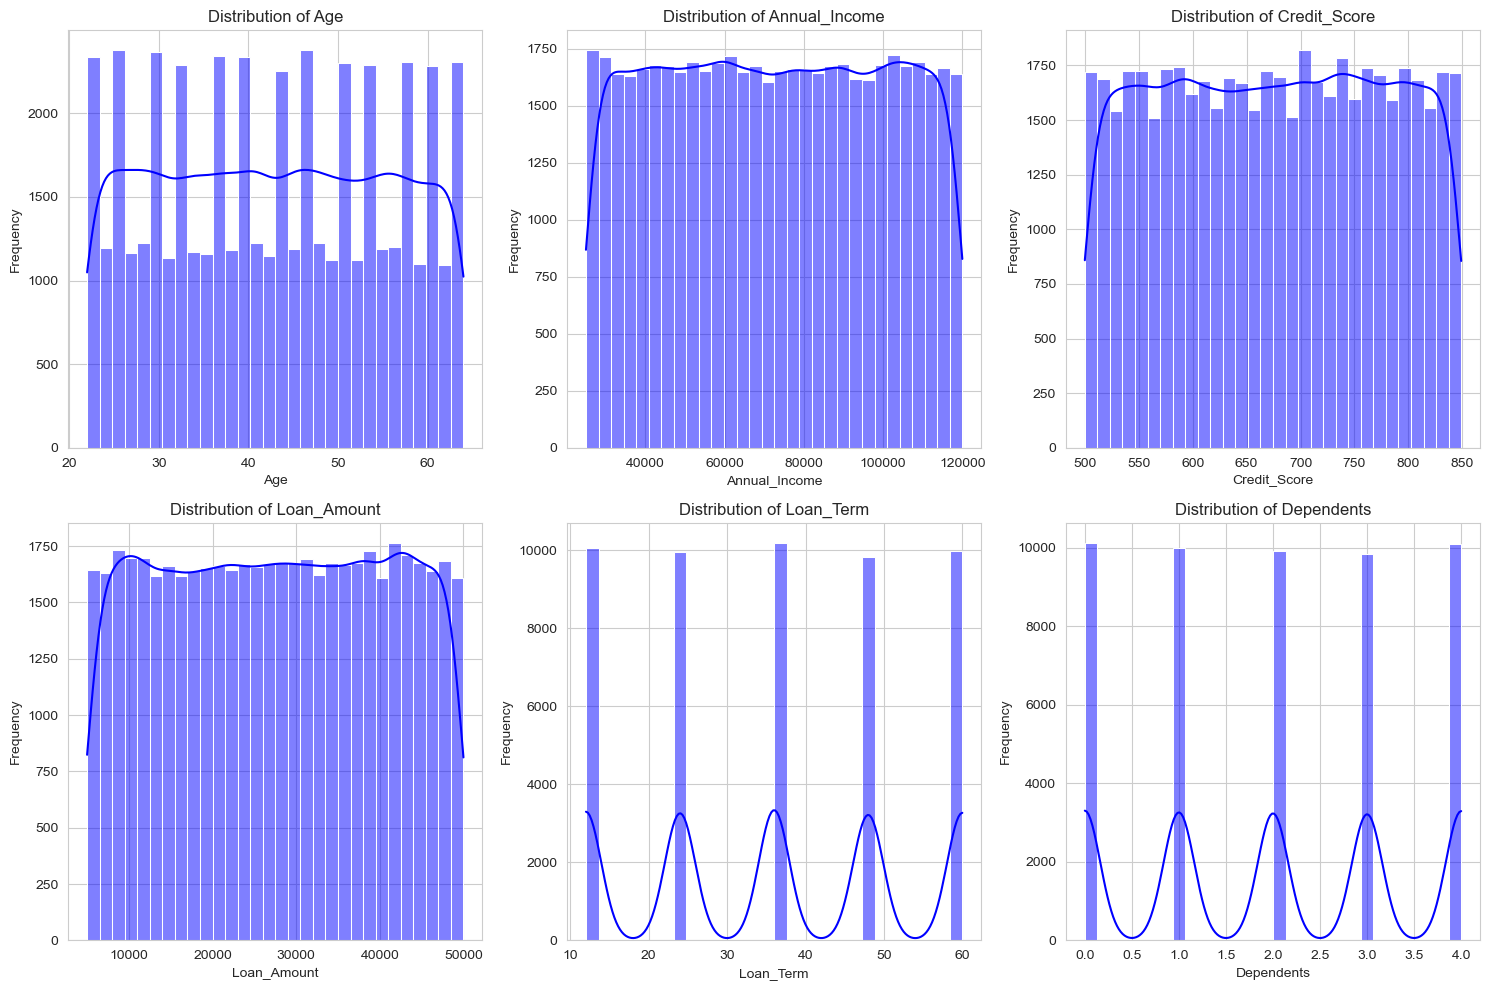

In [9]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns[:6]):  # Limit to first 6 numerical columns
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [10]:
#Inference: The distributions show uniform spreads across Age, Annual Income, Credit Score, and Loan Amount, indicating a diverse applicant pool. Loan Term and Dependents have distinct peaks, reflecting structured categorical choices. The data appears well-distributed, making it suitable for Naïve Bayes, which assumes independence among features.

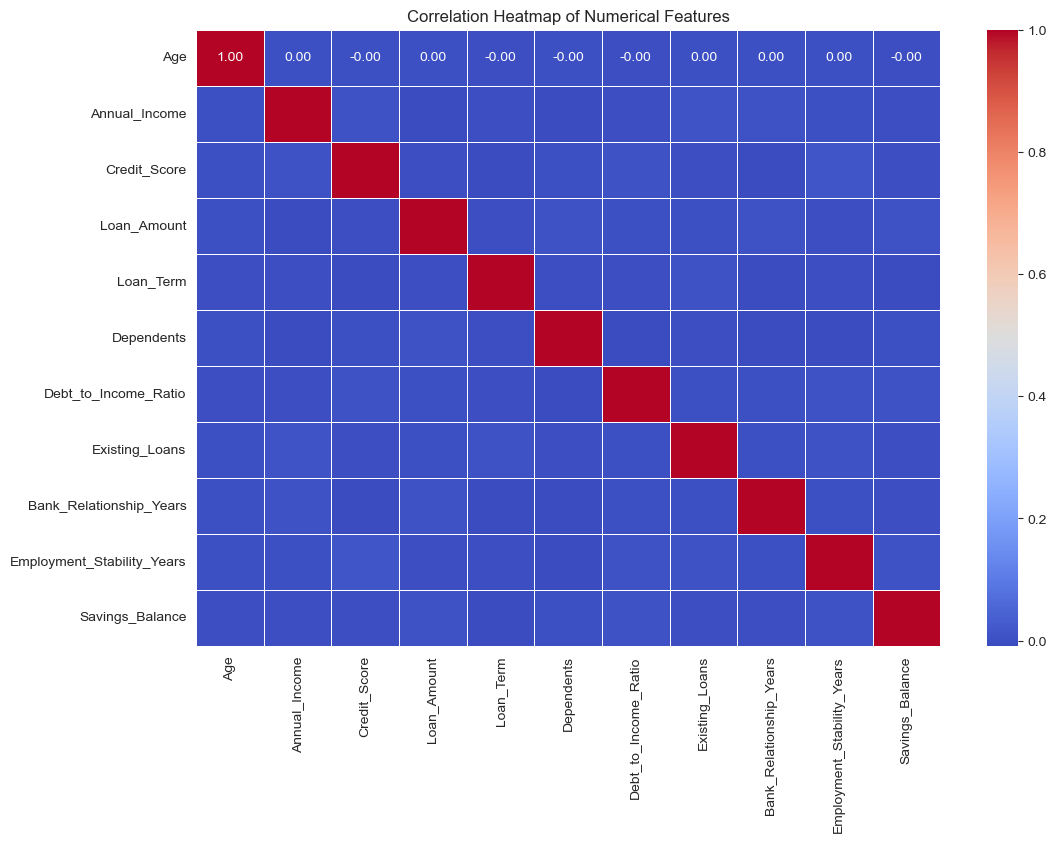

In [11]:
plt.figure(figsize=(12, 8))
corr_matrix = df[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [12]:
#Inference: The correlation heatmap shows almost no significant relationships between numerical features, indicating that the variables are largely independent. This aligns well with Naïve Bayes, which assumes feature independence for classification.

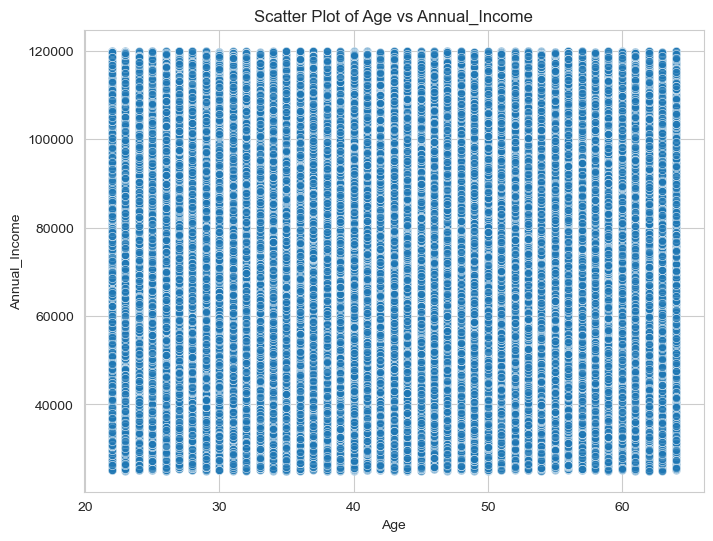

In [13]:
#Scatter Plot: Age V/S Annual Income

if len(numerical_columns) >= 2:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[numerical_columns[0]], y=df[numerical_columns[1]], alpha=0.7)
    plt.title(f"Scatter Plot of {numerical_columns[0]} vs {numerical_columns[1]}")
    plt.xlabel(numerical_columns[0])
    plt.ylabel(numerical_columns[1])
    plt.show()

In [14]:
#Inference: The scatter plot of Age vs. Annual_Income shows a uniform distribution of income across different age groups. There is no clear trend or correlation, suggesting that income is evenly spread across all ages in the dataset, rather than increasing or decreasing with age.

C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

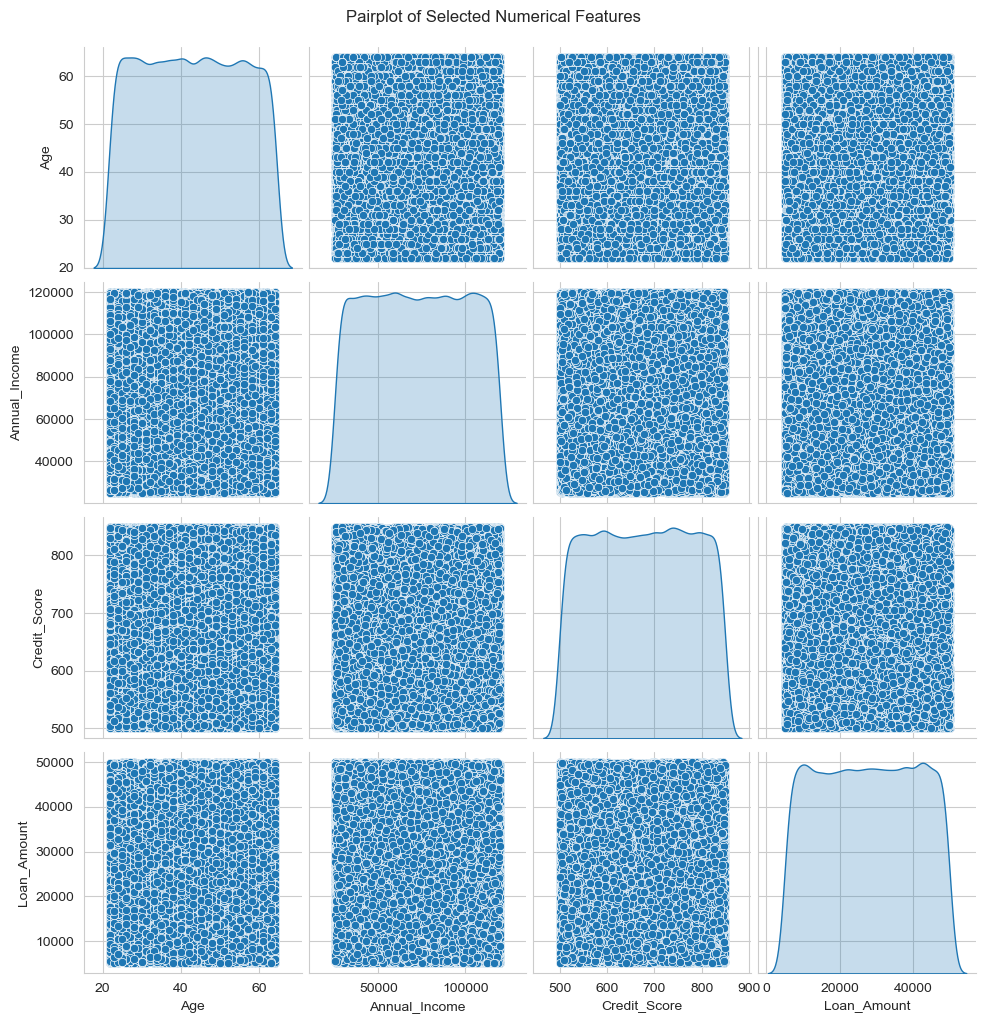

In [15]:
#Pair Plots

if len(numerical_columns) > 1:
    sample_cols = numerical_columns[:4]  # Select up to 4 numerical columns to avoid issues
    sns.pairplot(df[sample_cols], diag_kind="kde")
    plt.suptitle("Pairplot of Selected Numerical Features", y=1.02)
    plt.show()

In [16]:
#Inference: The pairplot shows no strong correlations among the variables, with values evenly distributed across their ranges.

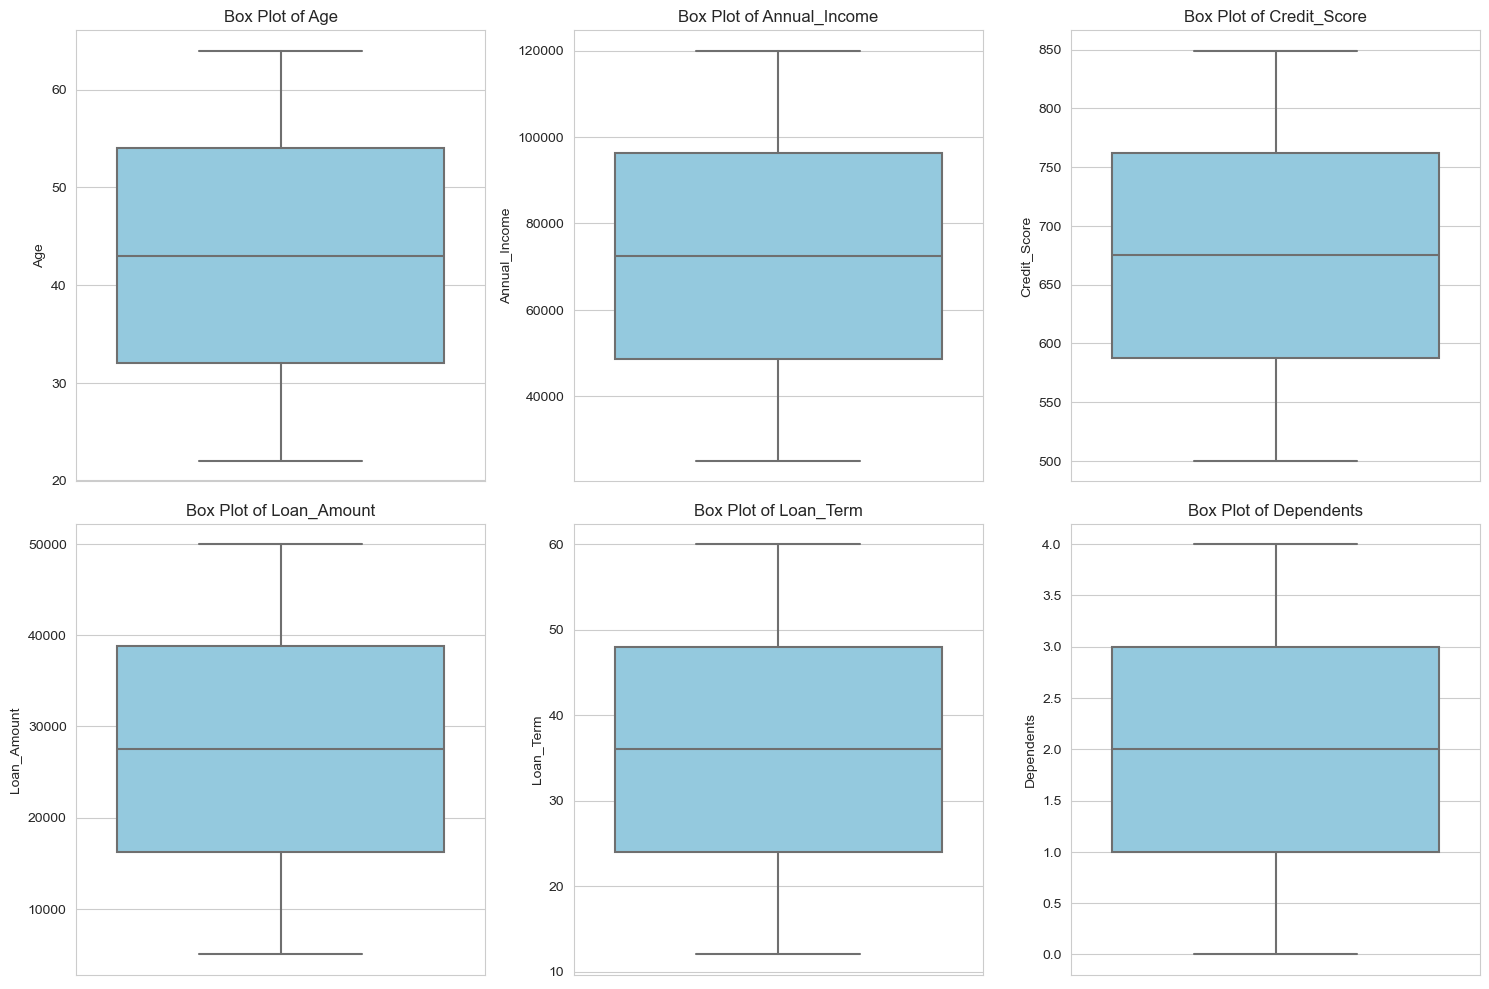

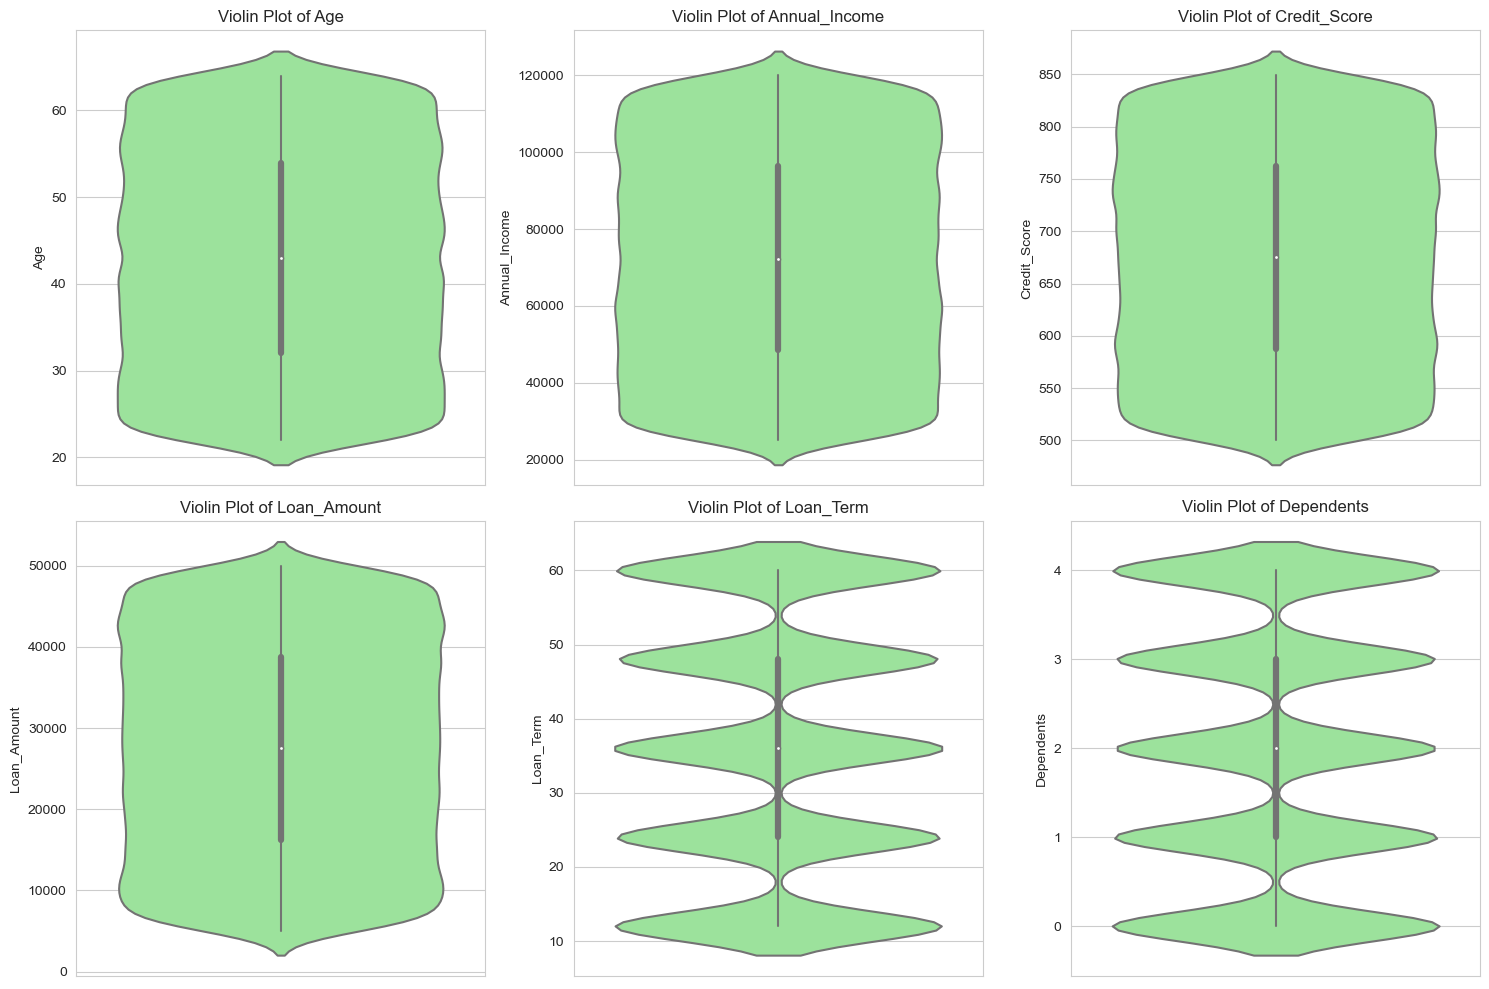

In [17]:
# Box and Whisker Plot (Outlier Detection)
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns[:6]):  # Limit to first 6 numerical columns
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# Violin Plot (Distribution and Density)
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns[:6]):
    plt.subplot(2, 3, i + 1)
    sns.violinplot(y=df[col], color='lightgreen')
    plt.title(f'Violin Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


In [18]:
#Inference: The box plots show a balanced distribution with no extreme outliers, while the violin plots highlight a uniform spread across most variables. Loan Term and Dependents display distinct peaks, indicating structured categorical distributions.

C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

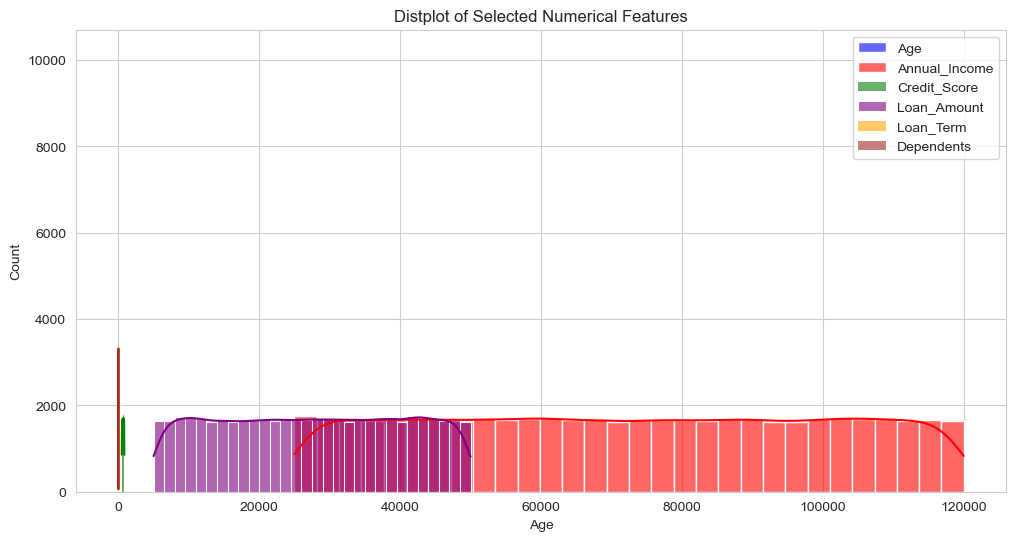

In [19]:
# Distplot (Feature Distribution) with one color per feature
plt.figure(figsize=(12, 6))
colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown']  # Define distinct colors

for i, col in enumerate(numerical_columns[:6]):
    sns.histplot(df[col], kde=True, bins=30, alpha=0.6, label=col, color=colors[i])

plt.title("Distplot of Selected Numerical Features")
plt.legend()
plt.show()

In [20]:
#Inference: The distplot shows Loan Amount and Annual Income as the most spread-out features, while Credit Score and Dependents have more concentrated distributions. This indicates varying scales and distributions across numerical features.

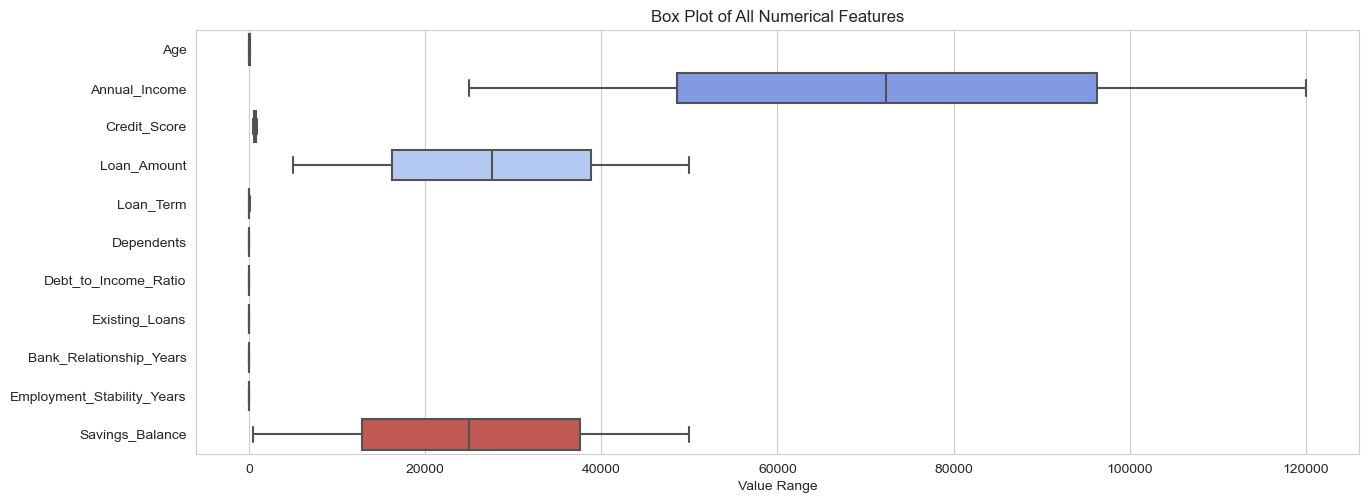

C:\Users\shari\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

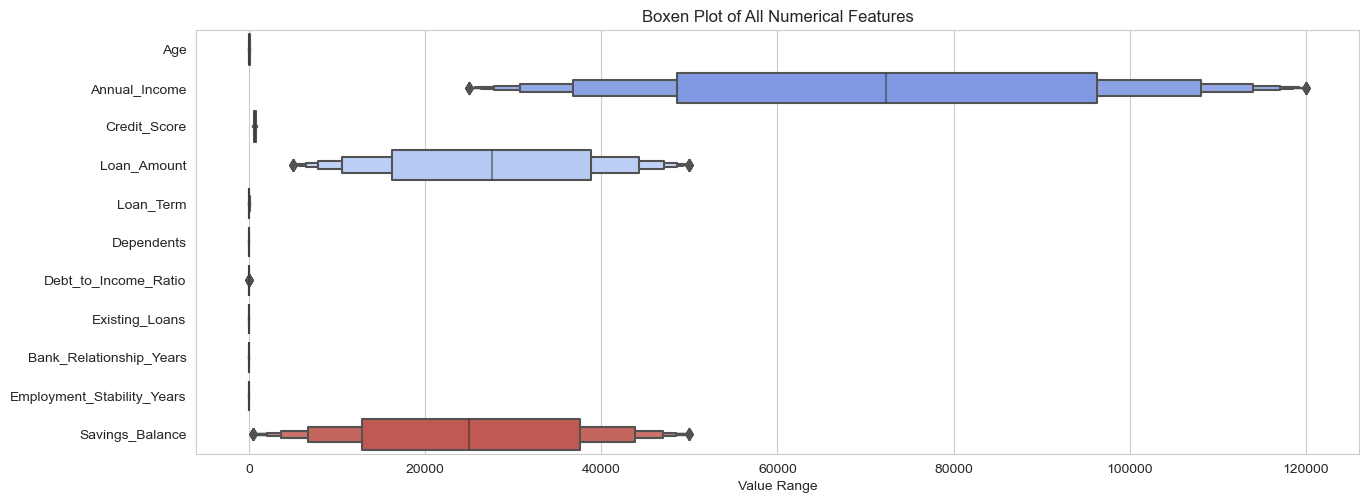

In [21]:
# --------------------------- #
# Outlier Detection
# --------------------------- #
plt.figure(figsize=(15, len(numerical_columns) * 0.5))
sns.boxplot(data=df[numerical_columns], orient="h", palette="coolwarm")
plt.title("Box Plot of All Numerical Features")
plt.xlabel("Value Range")
plt.show()

plt.figure(figsize=(15, len(numerical_columns) * 0.5))
sns.boxenplot(data=df[numerical_columns], orient="h", palette="coolwarm")
plt.title("Boxen Plot of All Numerical Features")
plt.xlabel("Value Range")
plt.show()

In [22]:
#Inference: The box plot highlights Annual Income and Loan Amount as having the widest range, with Savings Balance showing some outliers. The boxen plot provides more granularity, revealing extreme values in Credit Score and Debt-to-Income Ratio, indicating variability in financial profiles.

Model Training and Testing

In [23]:
# Split dataset into features and target variable
X = df.drop(columns=["Loan_Status"])
y = df["Loan_Status"]

In [24]:
# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

Evaluvation and Analysis

In [26]:
#Train and evaluate model

# Initialize Naïve Bayes model
nb_model = GaussianNB()

# Dictionary to store results
results = {}

print("Training Naïve Bayes...")
nb_model.fit(X_train, y_train)  # Train only Naïve Bayes
y_pred = nb_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=target_names)

# Store results
results["Naïve Bayes"] = {
    "Accuracy": accuracy,
    "Classification Report": classification_rep
}

# Display results
print(f"\nModel: Naïve Bayes")
print(f"Accuracy: {results['Naïve Bayes']['Accuracy']:.4f}")
print("Classification Report:\n", results["Naïve Bayes"]["Classification Report"])

Training Naïve Bayes...

Model: Naïve Bayes
Accuracy: 0.8929
Classification Report:
               precision    recall  f1-score   support

    Approved       0.94      0.76      0.84      3717
    Rejected       0.87      0.97      0.92      6283

    accuracy                           0.89     10000
   macro avg       0.91      0.87      0.88     10000
weighted avg       0.90      0.89      0.89     10000



In [27]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train Naïve Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train_smote, y_train_smote)

# Predict on test data
y_pred = nb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print results
print(f"Naïve Bayes with SMOTE Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Naïve Bayes with SMOTE Accuracy: 0.9073
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.87      3717
           1       0.92      0.93      0.93      6283

    accuracy                           0.91     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
#As forecasted, Naive Bayes performs well. But, there is a chance of overfitting since it yielded a pretty high accuracy.

In [30]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train Naïve Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train_smote, y_train_smote)

# Predict on test data
y_pred = nb_model.predict(X_test)
y_pred_prob = nb_model.predict_proba(X_test)[:, 1]  # Get probabilities for ROC-AUC

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Perform Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(nb_model, X_train_smote, y_train_smote, cv=cv, scoring='accuracy')

# Print results
print(f"Naïve Bayes with SMOTE Accuracy: {accuracy:.4f}")
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Naïve Bayes with SMOTE Accuracy: 0.9073
Cross-Validation Accuracy Scores: [0.915556   0.90988661 0.90192958 0.91395603 0.91306078]
Mean CV Accuracy: 0.9109
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.87      3717
           1       0.92      0.93      0.93      6283

    accuracy                           0.91     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
#The cross-validation test proved that the model can be generalized since the test accuracy is almost equal to validation accuracy.

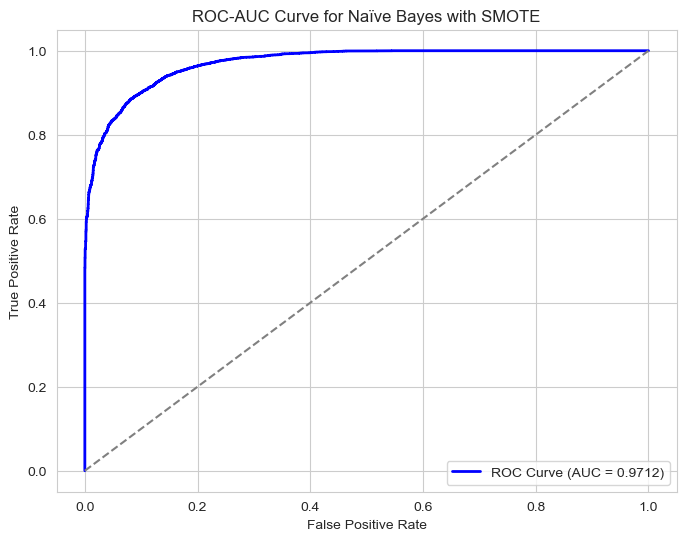

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

# Plot ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve for Naïve Bayes with SMOTE")
plt.legend(loc="lower right")
plt.show()

Conclusion

In [ ]:
#Naive Bayes performs and generalizes well.

In [33]:
df

,Age,Gender,Employment_Status,Annual_Income,Credit_Score,Loan_Amount,Loan_Term,Property_Type,Marital_Status,Dependents,...,Home_Ownership,Loan_Type,Employment_Sector,Co_Applicant,Residency_Status,Loan_Purpose_Type,Bank_Relationship_Years,Employment_Stability_Years,Savings_Balance,Loan_Status
0,31,0,3,81414,591,41261,24,0,3,3,...,3,1,0,0,0,0,14,4,19006,1
1,49,2,4,47213,653,29081,24,1,2,2,...,3,1,4,1,2,2,13,4,9527,1
2,31,2,0,93447,702,41778,60,0,0,2,...,0,1,2,1,3,2,6,8,3833,1
3,37,0,4,73492,731,39119,48,4,0,4,...,0,0,4,0,0,2,9,0,40021,0
4,56,1,2,80112,500,45496,36,3,3,4,...,2,0,4,1,0,5,4,12,2948,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,44,1,2,42598,598,27514,24,3,1,2,...,2,1,3,0,1,5,3,8,26752,1
49996,52,0,3,45937,643,48499,36,0,0,4,...,1,0,2,1,3,4,3,4,33975,1
49997,23,0,2,26554,811,44298,60,4,2,2,...,0,0,2,1,3,3,7,14,38956,0
49998,24,2,0,86006,705,34828,36,0,2,0,...,3,0,2,0,0,3,18,10,27635,0
